In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [249]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [250]:
df_train.head()
df_train.shape

(799, 12)

In [251]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,800,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.00,1,1,345773,24.1500,NaN,S
1,801,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
2,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
3,803,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
4,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [252]:
df_train.nunique()

PassengerId    799
Survived         2
Pclass           3
Name           799
Sex              2
Age             85
SibSp            7
Parch            7
Ticket         625
Fare           234
Cabin          136
Embarked         3
dtype: int64

In [253]:
cat_col = ["Pclass","Sex","SibSp","Parch","Embarked"]
con_col = ["Age","Fare"]
tag_col =["Survived"]
drop_col=["PassengerId","Name","Ticket","Cabin"]
print(df[cat_col]["SibSp"].unique())
print(df[cat_col])
print(df[con_col])
print(df[drop_col])

[1 0 3 4 2 5 8]
     Pclass     Sex  SibSp  Parch Embarked
0         3    male      1      0        S
1         1  female      1      0        C
2         3  female      0      0        S
3         1  female      1      0        S
4         3    male      0      0        S
..      ...     ...    ...    ...      ...
794       3    male      0      0        S
795       2    male      0      0        S
796       1  female      0      0        S
797       3  female      0      0        S
798       3    male      0      0        C

[799 rows x 5 columns]
      Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
794  25.0   7.8958
795  39.0  13.0000
796  49.0  25.9292
797  31.0   8.6833
798  30.0   7.2292

[799 rows x 2 columns]
     PassengerId                                               Name  \
0              1                            Braund, Mr. Owen Harris   
1              2  Cumings, Mrs. John Bradley (Flor

In [254]:
df_train[con_col].describe()

,Age,Fare
count,636.000000,799.000000
mean,29.870943,33.049660
std,14.555748,51.556263
min,0.670000,0.000000
25%,21.000000,7.925000
50%,28.000000,14.500000
75%,38.000000,31.275000
max,80.000000,512.329200


In [255]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            163
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          614
Embarked         1
dtype: int64

In [256]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

In [257]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [258]:
df_train = pd.get_dummies(df_train, columns = cat_col , drop_first=True)

In [259]:
df_train

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,795,0,"Dantcheff, Mr. Ristiu",25.0,349203,7.8958,NaN,0,1,1,...,0,0,0,0,0,0,0,0,0,1
795,796,0,"Otter, Mr. Richard",39.0,28213,13.0000,NaN,1,0,1,...,0,0,0,0,0,0,0,0,0,1
796,797,1,"Leader, Dr. Alice (Farnham)",49.0,17465,25.9292,D17,0,0,0,...,0,0,0,0,0,0,0,0,0,1
797,798,1,"Osman, Mrs. Mara",31.0,349244,8.6833,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [260]:
df_test["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [261]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            14
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          73
Embarked        1
dtype: int64

In [262]:
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0])

In [263]:
df_test = pd.get_dummies(df_test,columns=cat_col,drop_first=True)

In [264]:
df_test

,PassengerId,Name,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_5,Embarked_Q,Embarked_S
0,800,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",30.000000,345773,24.1500,NaN,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,801,"Ponesell, Mr. Martin",34.000000,250647,13.0000,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,802,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",31.000000,C.A. 31921,26.2500,NaN,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,803,"Carter, Master. William Thornton II",11.000000,113760,120.0000,B96 B98,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,804,"Thomas, Master. Assad Alexander",0.420000,2625,8.5167,NaN,0,1,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,887,"Montvila, Rev. Juozas",27.000000,211536,13.0000,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,1
88,888,"Graham, Miss. Margaret Edith",19.000000,112053,30.0000,B42,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89,889,"Johnston, Miss. Catherine Helen ""Carrie""",28.298077,W./C. 6607,23.4500,NaN,0,1,0,1,0,0,0,0,0,1,0,0,0,1
90,890,"Behr, Mr. Karl Howell",26.000000,111369,30.0000,C148,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [265]:
df_train_drop_survive = df_train.drop(["Survived"],axis=1)
missing_col = set(df_train_drop_survive.columns)- set(df_test.columns)
for i in missing_col:
    df_test[i] = 0

In [266]:
print(len(df_train.columns))
print(len(df_test.columns))
print(df_train.columns)
print(df_test.columns)

24
23
Index(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_5', 'Embarked_Q',
       'Embarked_S', 'SibSp_5', 'Parch_4', 'Parch_6'],
      dtype='object')


In [217]:
df_test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_5,Embarked_Q,Embarked_S,SibSp_5,Parch_4,Survived,Parch_6
0,30.000000,24.1500,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,34.000000,13.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,31.000000,26.2500,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,11.000000,120.0000,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.420000,8.5167,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,27.000000,13.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
88,19.000000,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
89,28.298077,23.4500,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
90,26.000000,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [267]:
df_train= df_train.drop(drop_col,axis=1)
df_test=df_test.drop(drop_col,axis=1)

In [268]:
df_train.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [279]:
print(X_test.shape)
print(df_test.shape)

(160, 19)
(92, 19)


In [330]:
#LogisticRegression 만들어 학습시키고 accuracy 측정
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(penalty ="none", C=0.00001 , max_iter=10)

X=df_train.drop(["Survived"],axis=1)
y = df_train[["Survived"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
print("---------------------")
logreg.fit(X_train,y_train)
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)
pred_dftest = logreg.predict(df_test)

print(pred_test.shape)
print(y_train.shape)
print(pred_train.shape)
print(y_test.shape)
print(pred_train.shape)
print("accuracy 체크", accuracy_score(y_test,pred_test))

# predict 호출 후 X_test 확인
print("X_test shape before predict:", X_test.shape)
y_pred = logreg.predict(X_test)
print("y_pred shape:", y_pred.shape)
print("X_test shape after predict:", X_test.shape)
print()



---------------------
(160,)
(639, 1)
(639,)
(160, 1)
(639,)
accuracy 체크 0.75
X_test shape before predict: (160, 19)
y_pred shape: (160,)
X_test shape after predict: (160, 19)



In [325]:
pred_test = logreg.predict(X_test)
print("accuracy 체크", accuracy_score(y_test,pred_test))

accuracy 체크 0.75


In [347]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print(y_pred_proba.shape)
print("test 데이터의 accuracy 점수:",accuracy_score(y_test,y_pred))

(160, 2)
test 데이터의 accuracy 점수: 0.75


In [348]:
y_pred_custom = (y_pred_proba[:, 1] > 0.5).astype(int)
print("Custom accuracy:", accuracy_score(y_test, y_pred_custom))


Custom accuracy: 0.75


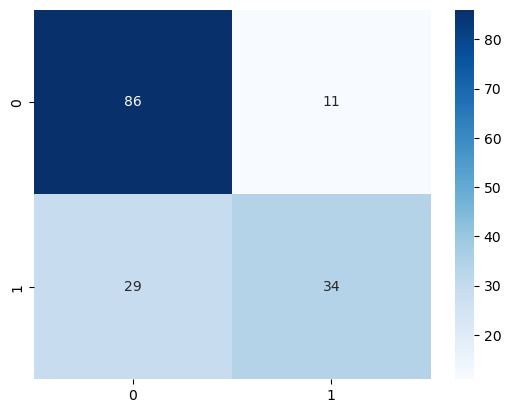

In [340]:
cm = confusion_matrix(y_test,pred_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

In [346]:
unseen_prob = logreg.predict(df_test)
print(unseen_prob)

[1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0]
